In this project we will apply the different concepts of NLP, that we have just covered thrugh a hands-on tourism in **Morocco**

In [ ]:
!pip install nltk

In [ ]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
import requests

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')


In [ ]:
#Importing my data through an API
import requests

def fetch_tourism_data_from_github():
    # GitHub raw content URL for the JSON file
    github_url = "https://raw.githubusercontent.com/salmaelbarbori/DataAICellResources/main/session7/tourism_data.json"

    # Send an HTTP request to the GitHub API
    response = requests.get(github_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Extract reviews from the dataset
        reviews = data.get("reviews", [])

        return reviews
    else:
        print(f"Failed to fetch data from GitHub. Status code: {response.status_code}")
        return []


In [ ]:
# Step 1: Fetch Tourism Data from GitHub
tourism_reviews = fetch_tourism_data_from_github()

In [ ]:
print("Original Text:")
print(tourism_reviews[:5])

Original Text:
[{'id': 1, 'review': 'The Hassan II Mosque is truly magnificent. A must-visit in Casablanca!'}, {'id': 2, 'review': "The blue streets of Chefchaouen are charming. It's like walking in a dream."}, {'id': 3, 'review': 'Visited the Atlas Mountains and had an unforgettable experience.'}, {'id': 4, 'review': 'The Kasbah of the Udayas in Rabat is rich in history and architecture.'}, {'id': 5, 'review': 'Spent a night camping in the Sahara Desert. The starry sky was breathtaking.'}]


In [ ]:
# Load data from the provided URL
data_url = "https://raw.githubusercontent.com/salmaelbarbori/DataAICellResources/main/session7/tourism_data.json"
response = requests.get(data_url)
data = response.json()

In [ ]:
# Extract reviews from the loaded data
reviews = data.get("reviews", [])

In [ ]:
# Step 1: Tokenization
tokenized_reviews = [word_tokenize(review['review']) for review in reviews]

In [ ]:
# Step 2: Stop Words Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [[word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words] for tokens in tokenized_reviews]


In [ ]:
# Step 3: Stemming
stemmer = PorterStemmer()
stemmed_tokens = [[stemmer.stem(word) for word in tokens] for tokens in filtered_tokens]

In [ ]:
# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in stemmed_tokens]


In [ ]:
# Step 5: Part-of-Speech Tagging with word_tokenize
pos_tags = [pos_tag(word_tokenize(review['review'])) for review in reviews]

In [ ]:
# Step 6: Named Entity Recognition
ner_results = [ne_chunk(pos_tag) for pos_tag in pos_tags]

In [ ]:
# Step 7: Analyzing Named Entities
def analyze_named_entities(ner_result):
    named_entities = []

    for chunk in ner_result:
        if hasattr(chunk, 'label') and chunk.label():
            entity = ' '.join(c[0] for c in chunk.leaves())
            entity_type = chunk.label()
            named_entities.append((entity, entity_type))

    return named_entities

named_entities_result = [analyze_named_entities(ner_result) for ner_result in ner_results]


In [ ]:
# Step 8: Sentiment Analysis
def analyze_sentiment(review):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(review)

    if sentiment_score['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment

sentiments = [analyze_sentiment(review['review']) for review in reviews]

In [ ]:
# Display the results
for i in range(len(reviews)):
    print(f"\nReview {reviews[i]['id']}:")
    print(f"Review Text: {reviews[i]['review']}")
    print(f"Named Entities: {named_entities_result[i]}")
    print(f"Sentiment: {sentiments[i]}")

## Visualization

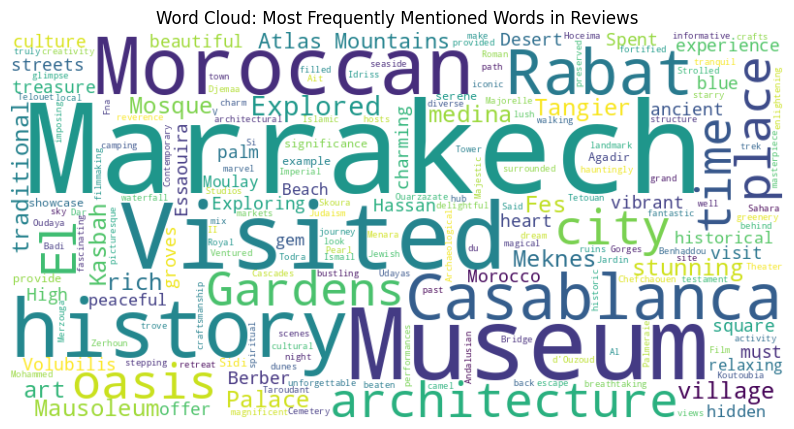

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single text
all_text = ' '.join(review['review'] for review in reviews)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Frequently Mentioned Words in Reviews')
plt.show()


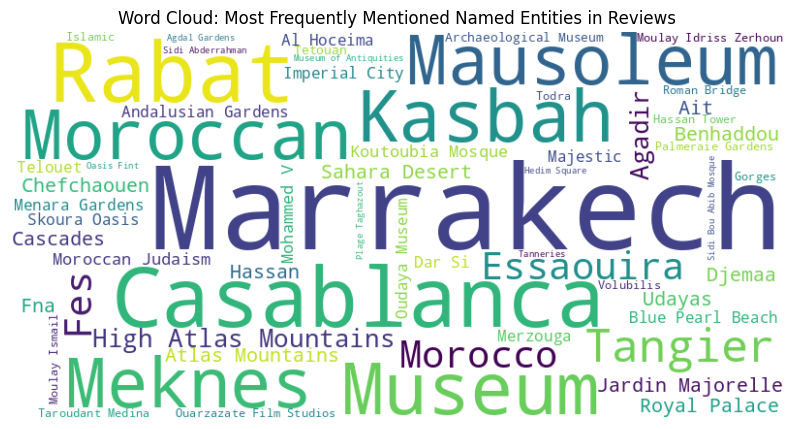

In [ ]:
from collections import Counter

# Flatten the list of named entities
all_entities = [entity[0] for entities in named_entities_result for entity in entities]

# Count the frequency of each named entity
entity_counts = Counter(all_entities)

# Generate a word cloud for named entities
wordcloud_entities = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(entity_counts)

# Display the word cloud for named entities
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_entities, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Frequently Mentioned Named Entities in Reviews')
plt.show()


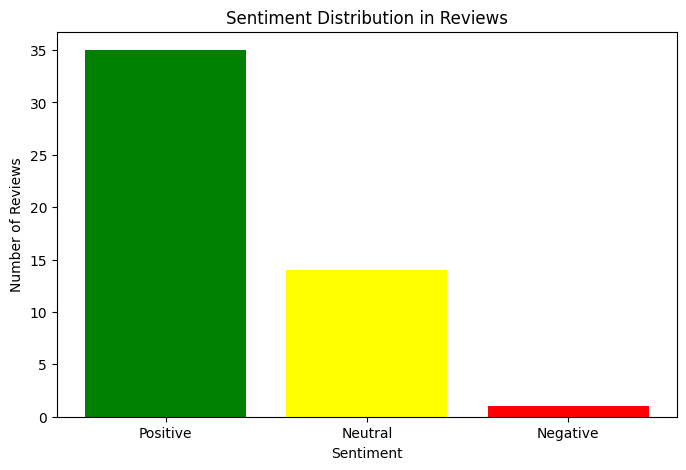

In [ ]:
# Count the frequency of each sentiment
sentiment_counts = Counter(sentiments)

# Plot a bar chart for sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'yellow', 'red'])
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


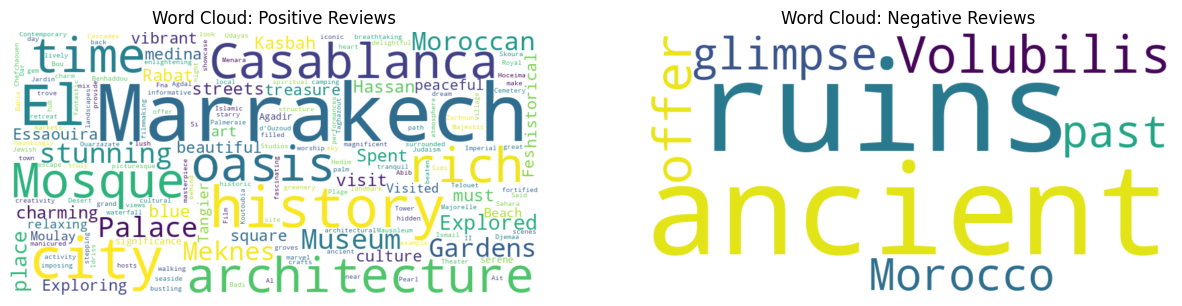

In [ ]:
# Separate reviews based on sentiment
positive_reviews = [review['review'] for review, sentiment in zip(reviews, sentiments) if sentiment == 'Positive']
negative_reviews = [review['review'] for review, sentiment in zip(reviews, sentiments) if sentiment == 'Negative']

# Generate word clouds for positive and negative reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display word clouds for positive and negative reviews
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud: Positive Reviews')

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud: Negative Reviews')

plt.show()
